In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Read Train Dataset

In [18]:
data=pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Fill Missing Values In Train Data

In [19]:
colmiss=[col for col in data.columns if data[col].isnull().any()]
print(colmiss)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [20]:
for col in colmiss:
    if(data[col].dtype == np.dtype('O')):
         data[col]=data[col].fillna(data[col].value_counts().index[0])    #replace nan with most frequent
    else:
        data[col] = data[col].fillna(data[col].mean()) 

In [21]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

In [22]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


 # Divide Data In X and Y Feature Scaling 

In [23]:
x=data.iloc[:,1:-1]
y=data.iloc[:,-1]

In [24]:
data.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL    65.000000     8450   Pave  Grvl      Reg   
1        2          20       RL    80.000000     9600   Pave  Grvl      Reg   
2        3          60       RL    68.000000    11250   Pave  Grvl      IR1   
3        4          70       RL    60.000000     9550   Pave  Grvl      IR1   
4        5          60       RL    84.000000    14260   Pave  Grvl      IR1   
5        6          50       RL    85.000000    14115   Pave  Grvl      IR1   
6        7          20       RL    75.000000    10084   Pave  Grvl      Reg   
7        8          60       RL    70.049958    10382   Pave  Grvl      IR1   
8        9          50       RM    51.000000     6120   Pave  Grvl      Reg   
9       10         190       RL    50.000000     7420   Pave  Grvl      Reg   
10      11          20       RL    70.000000    11200   Pave  Grvl      Reg   
11      12          

In [25]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [26]:
x.shape

(1460, 79)

In [27]:
x.isnull().sum()   

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
                ..
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [28]:
x.select_dtypes(include=['object']).head(6)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
5,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [29]:
i=0
for name in data.columns: 
    print(name,i)
    i+=1

Id 0
MSSubClass 1
MSZoning 2
LotFrontage 3
LotArea 4
Street 5
Alley 6
LotShape 7
LandContour 8
Utilities 9
LotConfig 10
LandSlope 11
Neighborhood 12
Condition1 13
Condition2 14
BldgType 15
HouseStyle 16
OverallQual 17
OverallCond 18
YearBuilt 19
YearRemodAdd 20
RoofStyle 21
RoofMatl 22
Exterior1st 23
Exterior2nd 24
MasVnrType 25
MasVnrArea 26
ExterQual 27
ExterCond 28
Foundation 29
BsmtQual 30
BsmtCond 31
BsmtExposure 32
BsmtFinType1 33
BsmtFinSF1 34
BsmtFinType2 35
BsmtFinSF2 36
BsmtUnfSF 37
TotalBsmtSF 38
Heating 39
HeatingQC 40
CentralAir 41
Electrical 42
1stFlrSF 43
2ndFlrSF 44
LowQualFinSF 45
GrLivArea 46
BsmtFullBath 47
BsmtHalfBath 48
FullBath 49
HalfBath 50
BedroomAbvGr 51
KitchenAbvGr 52
KitchenQual 53
TotRmsAbvGrd 54
Functional 55
Fireplaces 56
FireplaceQu 57
GarageType 58
GarageYrBlt 59
GarageFinish 60
GarageCars 61
GarageArea 62
GarageQual 63
GarageCond 64
PavedDrive 65
WoodDeckSF 66
OpenPorchSF 67
EnclosedPorch 68
3SsnPorch 69
ScreenPorch 70
PoolArea 71
PoolQC 72
Fence 73


# Convert Catogorical Data in Numeric Data

In [42]:
for co in x.select_dtypes(include=['object']):
    print(x[co].describe())

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
count     1460
unique       2
top       Grvl
freq      1419
Name: Alley, dtype: object
count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object
count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object
count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object
count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object
count     1460
unique       8
top       Norm
freq      1445
Name: Conditi

In [43]:
LE = LabelEncoder()
for col in x.select_dtypes(include=['object']):
    x[col] = LE.fit_transform(x[col])

# Data  Visualization

In [31]:
dc=data.corr()
dc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050199,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


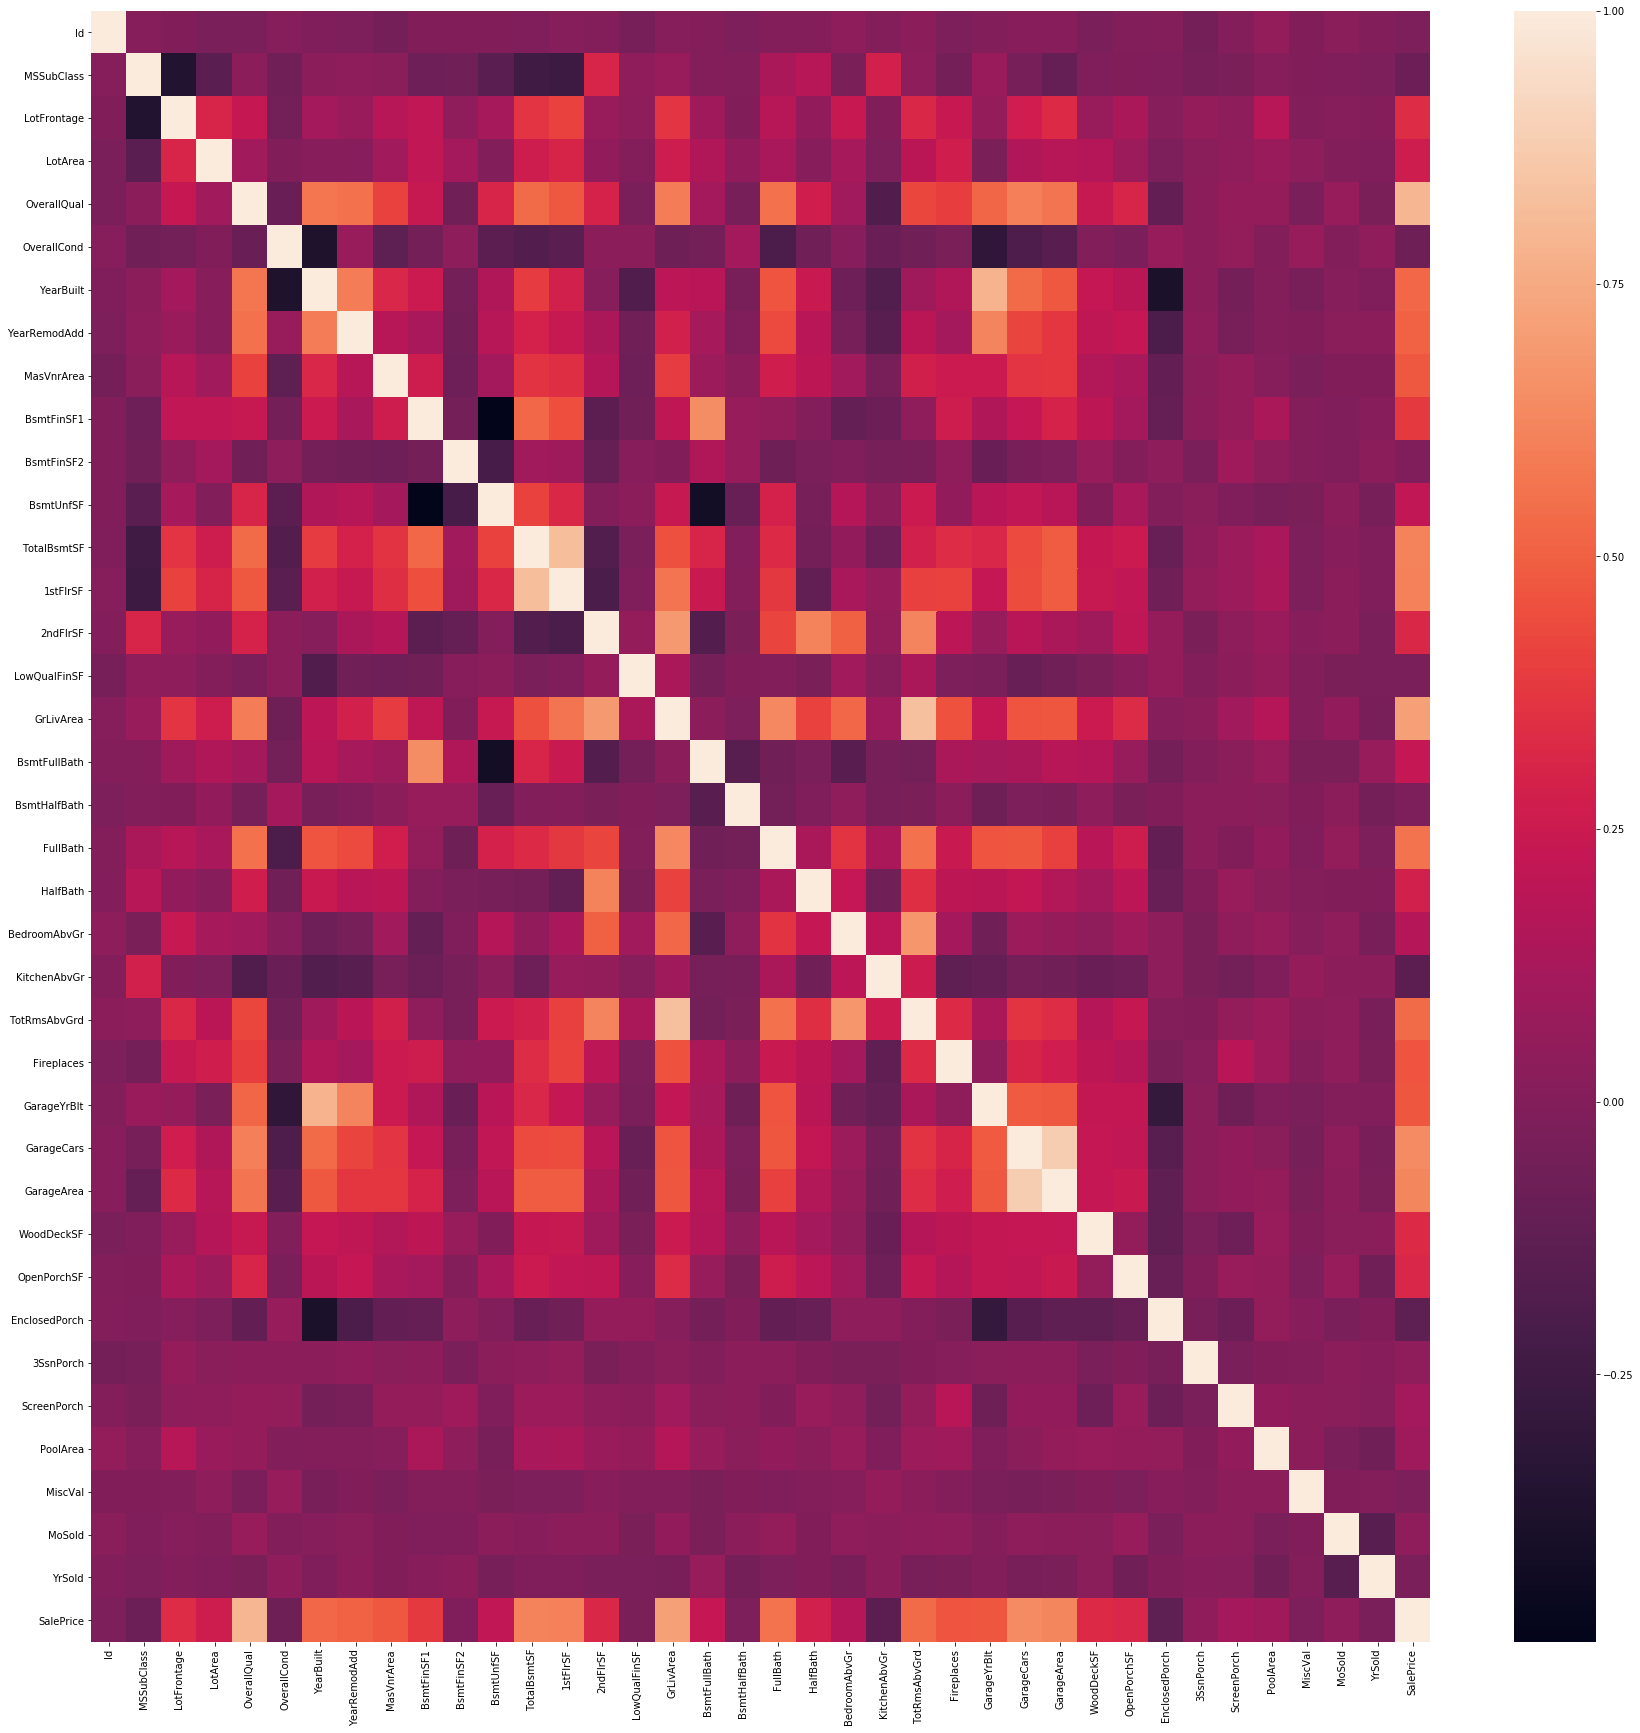

In [53]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD1A48F860>,
      dtype=object)

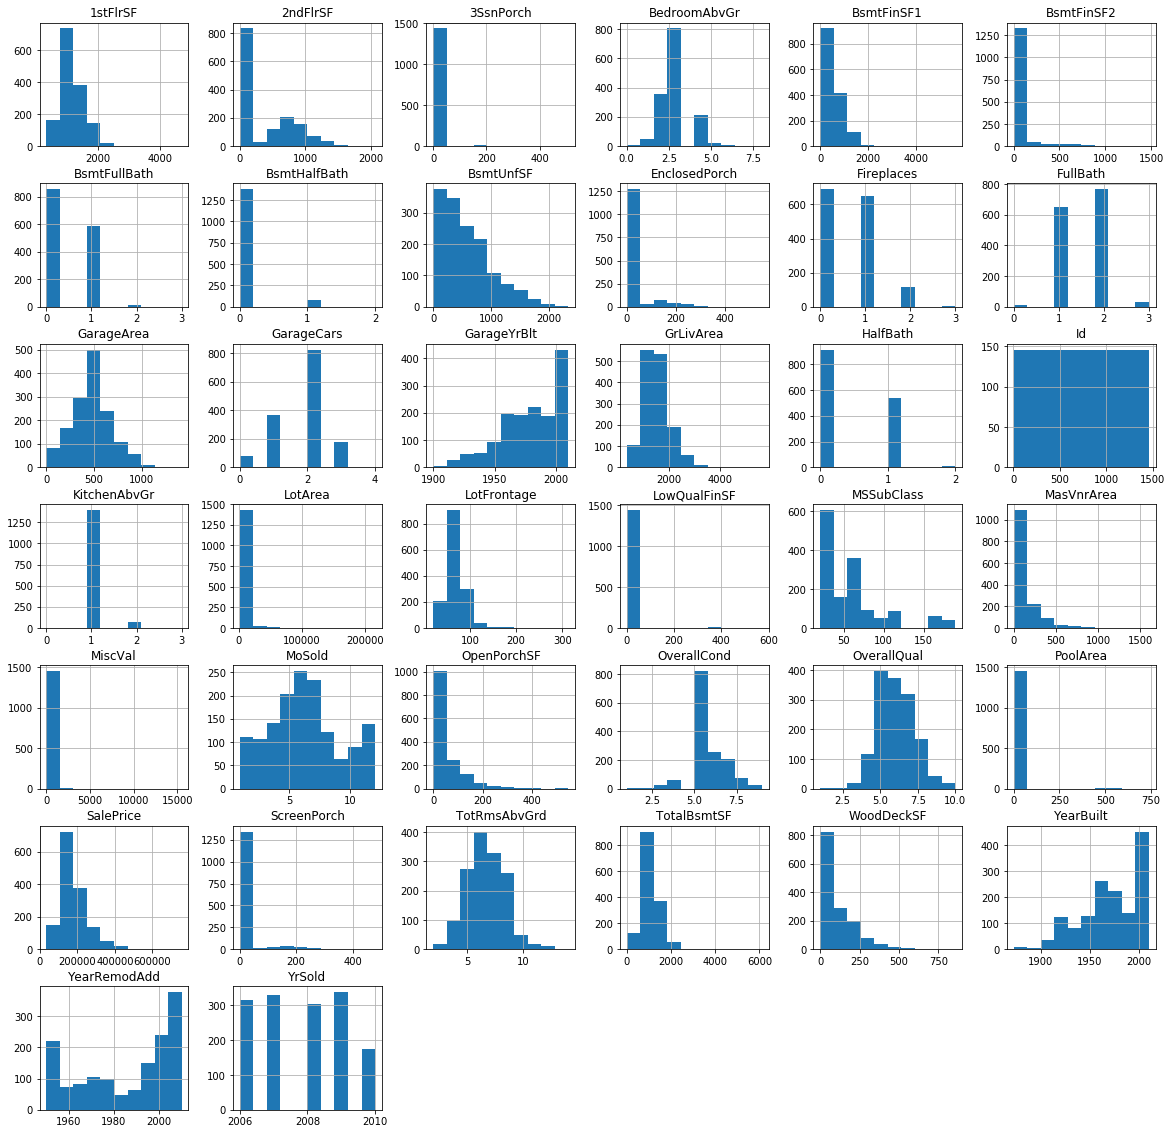

In [52]:
data.hist(figsize=(20,20))

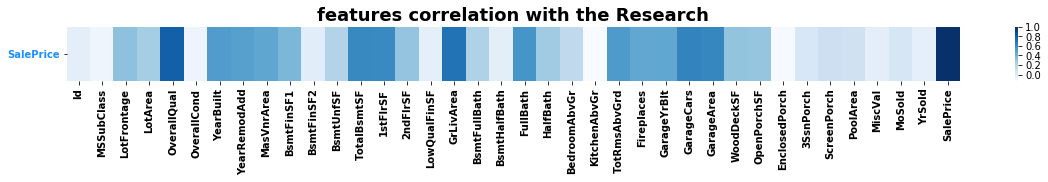

In [56]:
corr = data.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(corr.sort_values(by=['SalePrice'],ascending=False).head(1), cmap='Blues')
plt.title("features correlation with the Research", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

C:\Users\VishalSharma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


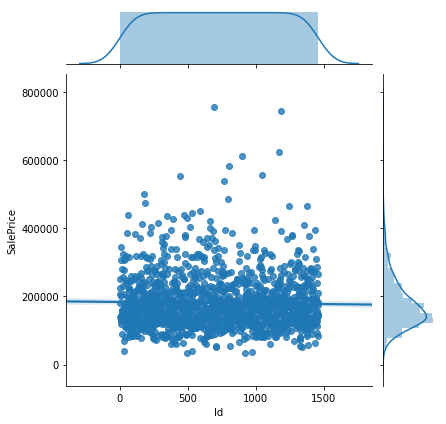

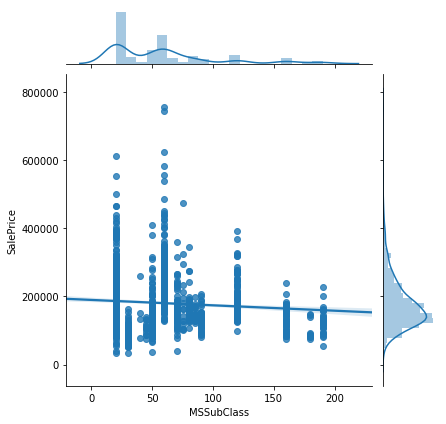

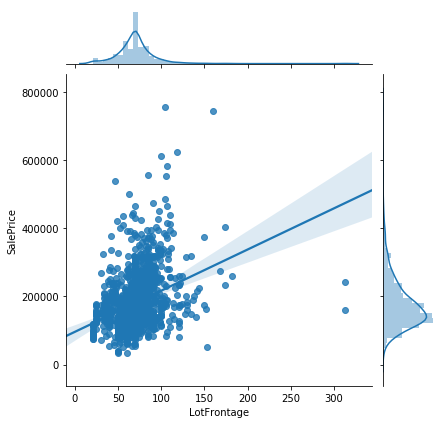

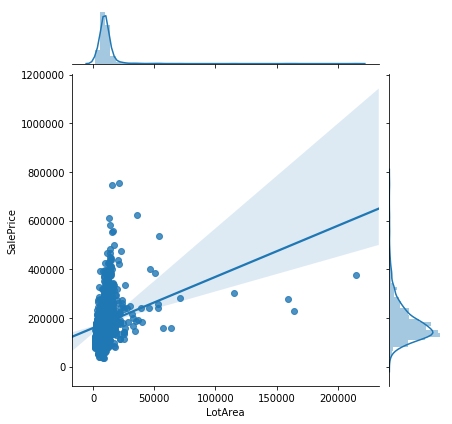

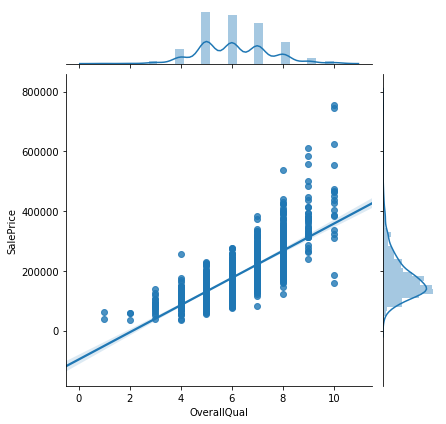

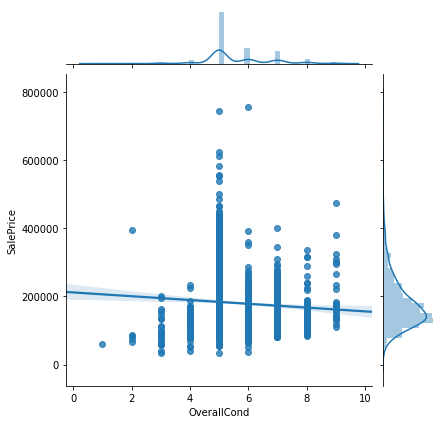

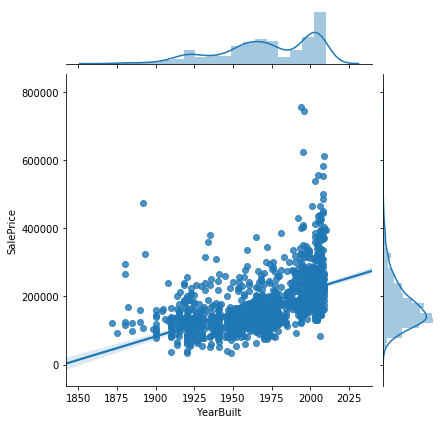

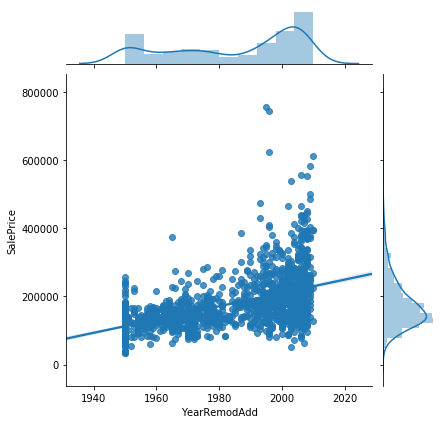

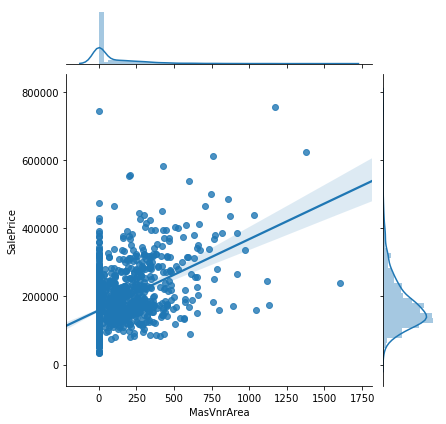

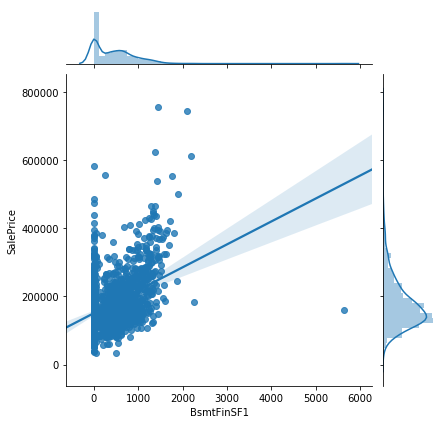

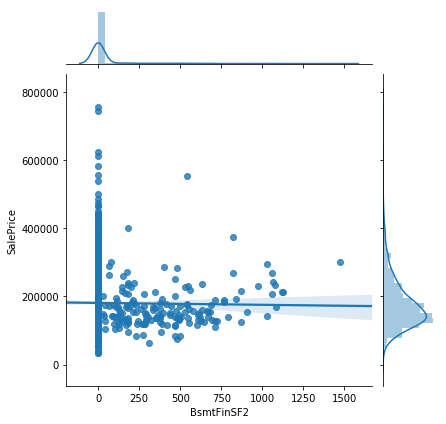

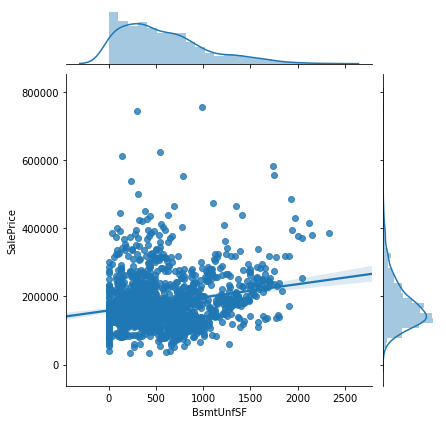

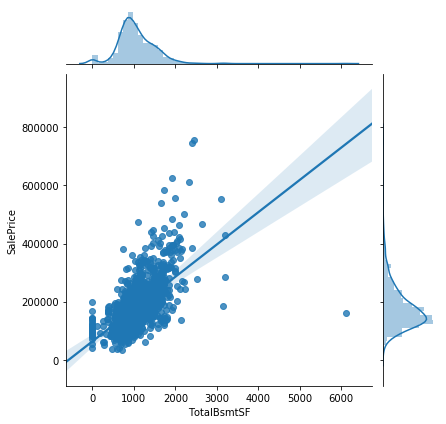

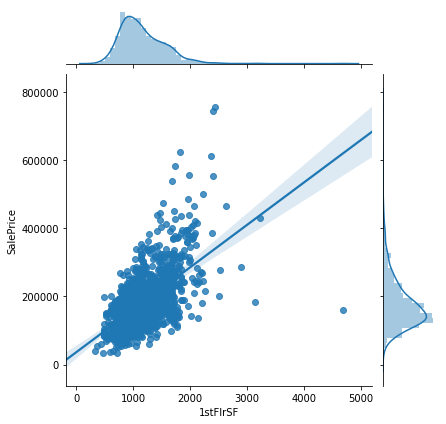

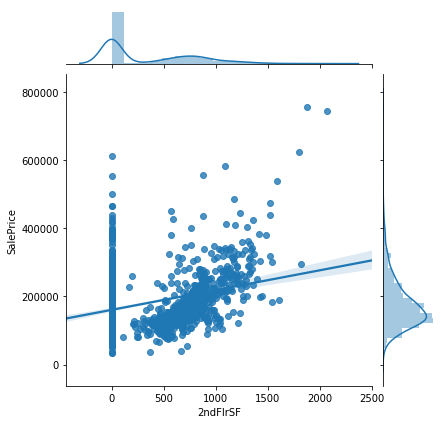

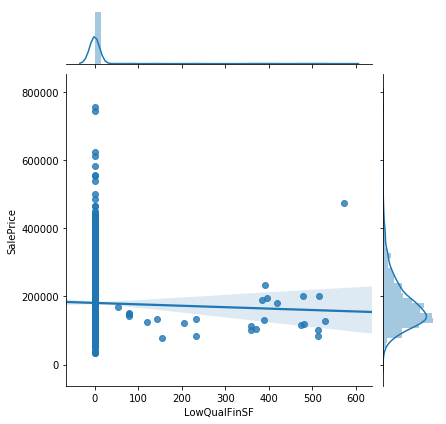

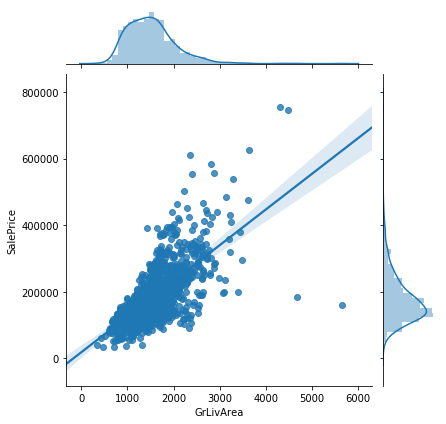

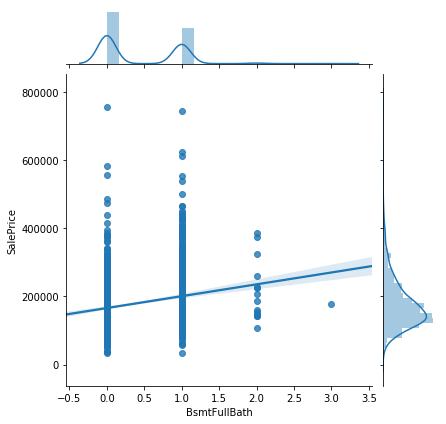

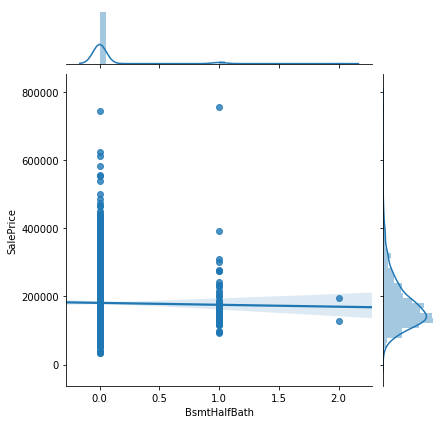

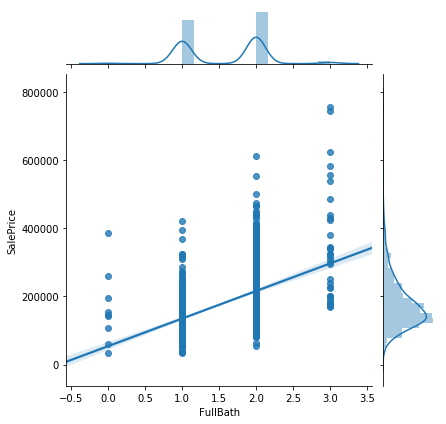

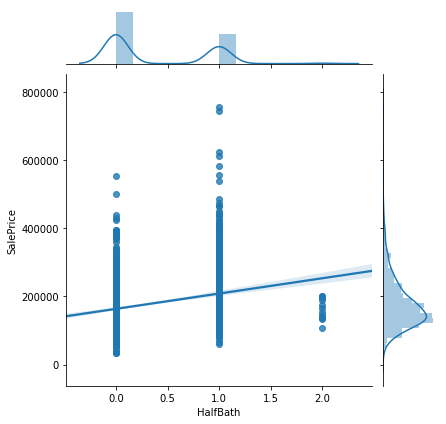

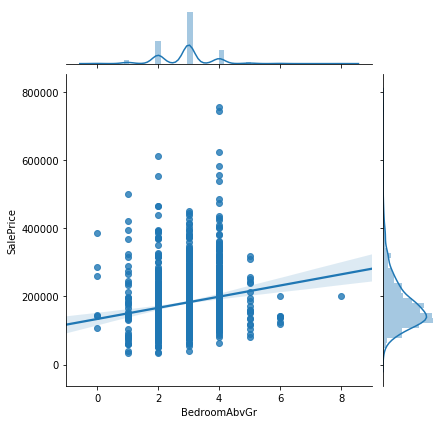

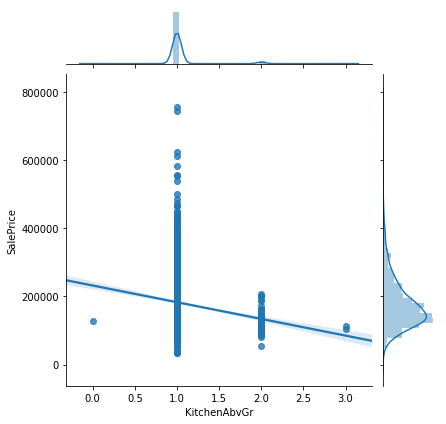

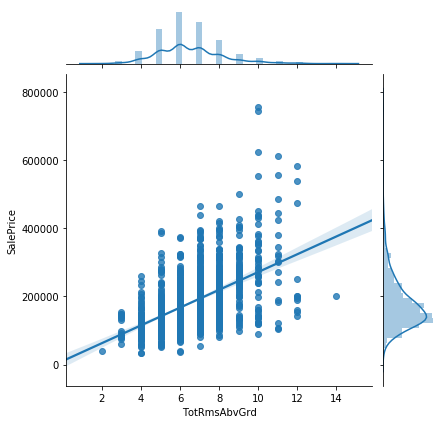

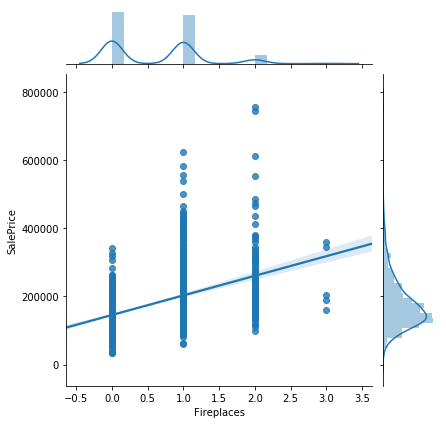

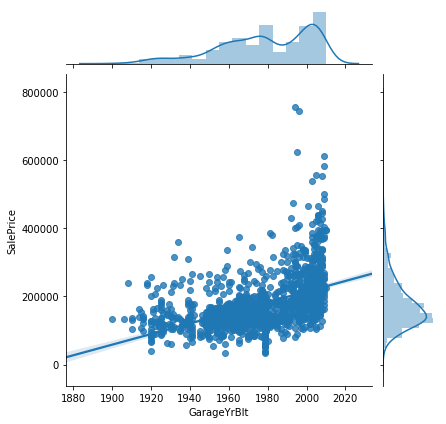

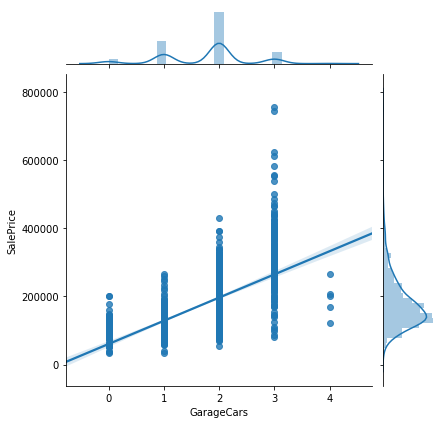

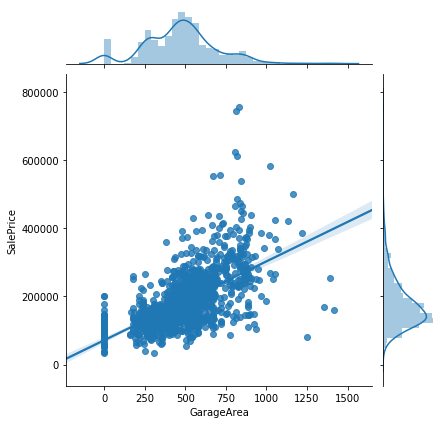

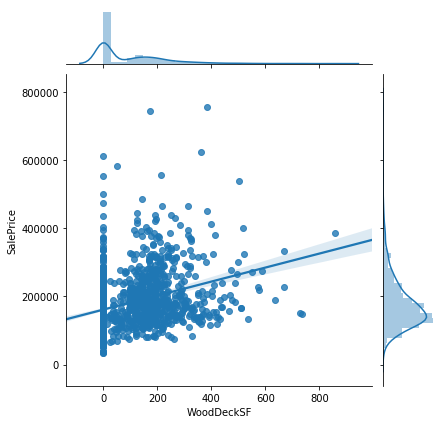

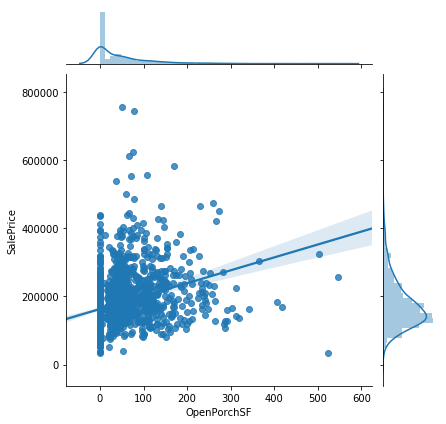

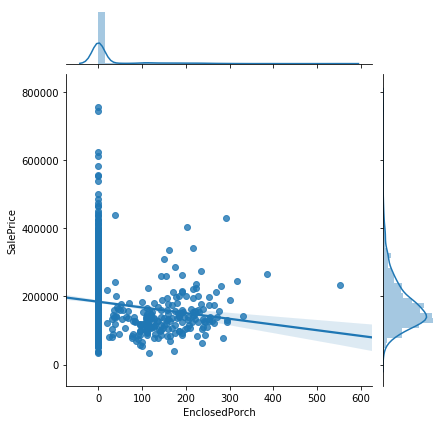

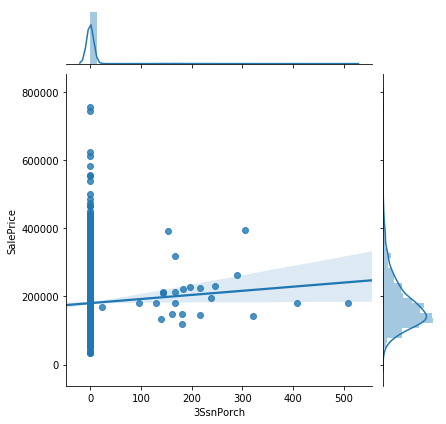

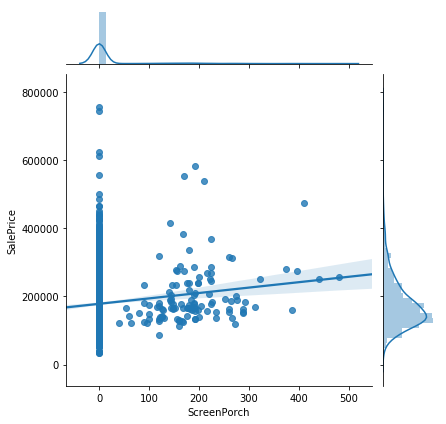

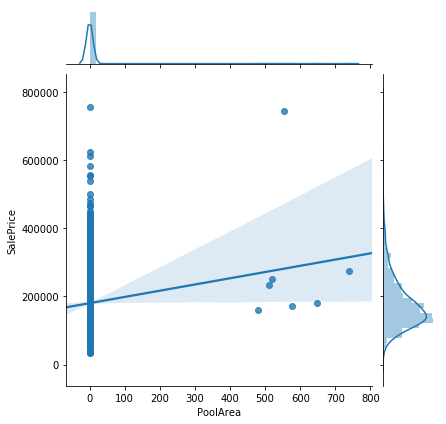

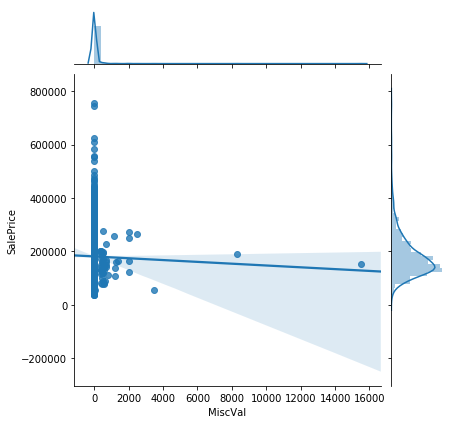

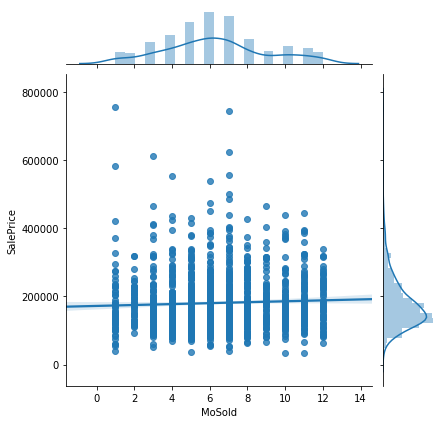

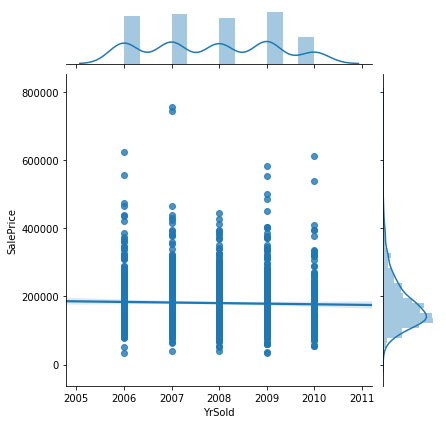

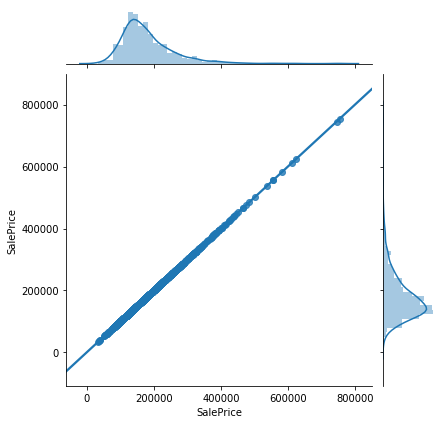

In [37]:
for sho in dc:
    sns.jointplot(x=sho,y="SalePrice",data=data,kind="reg")

# Model Build  

In [66]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=0)

In [95]:
reg=RandomForestRegressor(n_estimators=300)
reg.fit(train_x,train_y)
pred_y=reg.predict(test_x)

In [96]:
print(reg.score(train_x,train_y)*100)
print(reg.score(test_x,test_y)*100)

97.95249138573784
85.65530158746846


In [131]:
from sklearn.linear_model import LinearRegression

In [133]:
MLR=LinearRegression()
MLR.fit(train_x,train_y)
y_pred=MLR.predict(test_x)

In [137]:
print(MLR.score(train_x,train_y)*100)
print(MLR.score(test_x,test_y)*100)

88.61187484639521
58.726473173744154


In [164]:
data1=pd.read_csv("test.csv")

In [166]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [168]:
data1.isnull().sum()
data1 = data1.iloc[:,1:]

In [170]:
data1.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [172]:
test_col_miss_val = [col for col in data1.columns if data1[col].isnull().any()]
print(test_col_miss_val)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [174]:
for col in test_col_miss_val:
    if(data1[col].dtype == np.dtype('O')):
        data1[col] = data1[col].fillna(data1[col].value_counts().index[0])    #replace nan with most frequent
        
    else:
        data1[col] = data1[col].fillna(data1[col].mean()) 

In [176]:
for col in data1.select_dtypes(include=['object']):
    data1[col] = LE.fit_transform(data1[col])  

In [178]:
Predictions=reg.predict(data1)

In [180]:
print(Predictions)

[125702.63       154817.83333333 184341.07       ... 151299.36
 109942.28333333 231977.70333333]


In [181]:
Submission=pd.read_csv("sample_submission.csv")

In [185]:
Result=pd.DataFrame({'Id':Submission.Id,"SalesPrice":Predictions})
Result.to_csv('submission.csv', index=False)
Result.head()

,Id,SalesPrice
0,1461,125702.630000
1,1462,154817.833333
2,1463,184341.070000
3,1464,183233.816667
4,1465,200328.066667
